# What is an Outlier?
An outlier is a data point that significantly differs from other observations in a dataset. It is an unusual value that does not follow the general pattern of the data. Outliers can occur due to variability in the data, measurement errors, or genuine extreme values.

## Why Do Outliers Matter?
Outliers can:
- Skew statistical summaries (e.g., mean, standard deviation).
- Mislead machine learning models, leading to poor predictions.
- Indicate data entry or measurement errors.
- Reveal important insights (e.g., fraud detection, rare events).

**Examples:**
- Imagine a class where most students are 10–12 years old. If one student is 50 years old, that’s an outlier.
- In a small company, most employees earn ₹30,000–₹50,000 per month. If one person earns ₹10,00,000 per month, that’s an outlier.
- In a test where most students score 70–90 marks, one student scoring 0 or 100 is an outlier.
- If daily temperatures in a city are around 25–30°C, but one day it shows 50°C, that’s an outlier (maybe a sensor error!).
- If most cars on a highway travel at 80–100 km/h, but one car is moving at 200 km/h, that’s an outlier.
- If apples in a market usually weigh 150–200 grams, but one apple weighs 500 grams, it’s an outlier.

## Univariate Outliers

A univariate outlier is an extreme or unusual value in a single variable (or column) in a dataset. It does not consider relationships between multiple variables.

### How to Detect Univariate Outliers?
1. **Using Summary Statistics (Mean, Median, Min, Max):** If a value is too high or too low compared to others, it might be an outlier.
2. **Using the IQR (Interquartile Range) Method:** Any value outside the range Q1 - 1.5 × IQR and Q3 + 1.5 × IQR is considered an outlier.
3. **Using Z-score (Standard Deviation Method):** If a value is more than 3 standard deviations from the mean, it is an outlier.

**Examples:**
- If most students have a height between 140 cm and 170 cm, but one student is 220 cm tall, that’s a univariate outlier.
- If most students score 60–90 marks, but one student scores 5 marks, that’s a univariate outlier.
- If most employees earn ₹30,000–₹50,000, but one person earns ₹5,00,000, that’s an outlier.

## Multivariate Outliers

A multivariate outlier is an unusual combination of values across two or more variables. Even if an individual value is not extreme in one variable, its combination with another variable makes it an outlier.

### How to Detect Multivariate Outliers?

1. **Using Scatter Plots:** A data point that lies far away from the cluster of other points is an outlier.
2. **Using Mahalanobis Distance:** Measures how far a point is from the center of all variables considering correlations.
3. **Using Local Outlier Factor (LOF)** Identifies density-based anomalies in multi-dimensional space.

**Examples:**
- If most people who are 160 cm tall weigh around 50–70 kg, but one person 160 cm tall weighs 150 kg, that’s a multivariate outlier.
- If most students who study 2–5 hours score 50–80 marks, but one student who studies 10 hours scores 10 marks, that’s a multivariate outlier (maybe an error or a special case).
- If most people aged 25–35 earn ₹30,000–₹80,000, but a 25-year-old earning ₹10,00,000 is an outlier.

#  Implementation for detecting univariate and multivariate outliers using different techniques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


## Detecting Univariate Outliers

In [2]:
# Creating a dataset with outliers
np.random.seed(42)

# Generate normal data
data = np.random.normal(50, 10, 100)  # Mean=50, Std=10, 100 values

# Add some outliers
data = np.append(data, [120, 130, 140, 5, 10])  # Extreme values

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Value"])

df.head()

,Value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


In [3]:
df.shape

(105, 1)

### 1️⃣ Using Box Plot (IQR Method)

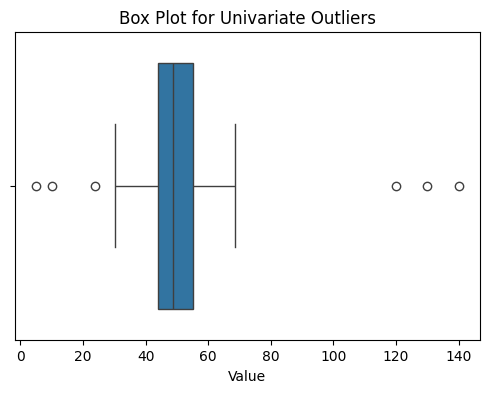

In [4]:
# Box plot to visualize outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Value"])
plt.title("Box Plot for Univariate Outliers")
plt.show()


**How it Works:**
- Values beyond the whiskers are potential outliers.
- Uses IQR rule: Outliers are outside (Q1 - 1.5×IQR) or (Q3 + 1.5×IQR).

In [5]:
# Detecting outliers using IQR
Q1 = df["Value"].quantile(0.25)
Q3 = df["Value"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers_iqr = df[(df["Value"] < lower_bound) | (df["Value"] > upper_bound)]
print("Univariate Outliers (IQR Method):\n")

outliers_iqr

Univariate Outliers (IQR Method):



,Value
74,23.802549
100,120.000000
101,130.000000
102,140.000000
103,5.000000
104,10.000000


### 2️⃣ Using Z-Score Method

In [6]:
# Compute Z-scores
df["Z-Score"] = np.abs(stats.zscore(df["Value"]))

# Define threshold (typically 3)
threshold = 3

# Identify outliers
outliers_z = df[df["Z-Score"] > threshold]
print("Univariate Outliers (Z-Score Method):\n")

outliers_z


Univariate Outliers (Z-Score Method):



,Value,Z-Score
100,120.0,4.027855
101,130.0,4.607296
102,140.0,5.186736


**How it Works:**
- Z-score measures how far a value is from the mean in standard deviations.
- Outliers have a `Z-score > 3`.

## Detecting Multivariate Outliers

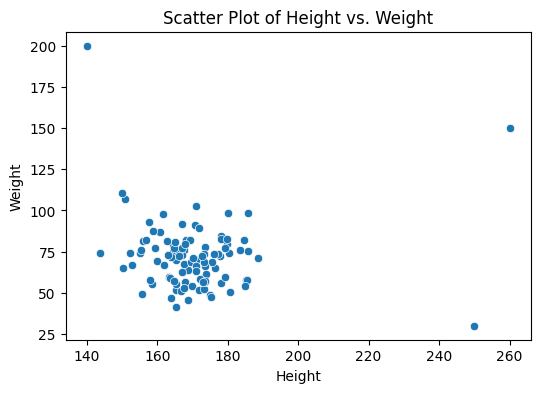

In [7]:
# Creating multivariate data (Height & Weight)
np.random.seed(42)
height = np.random.normal(170, 10, 100)  # Normal height data
weight = np.random.normal(70, 15, 100)   # Normal weight data

# Add some outliers
height = np.append(height, [250, 260, 140])  # Extreme heights
weight = np.append(weight, [30, 150, 200])   # Extreme weights

# Convert to DataFrame
df_multi = pd.DataFrame({"Height": height, "Weight": weight})

# Scatter plot to visualize multivariate outliers
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df_multi["Height"], y=df_multi["Weight"])
plt.title("Scatter Plot of Height vs. Weight")
plt.show()


In [8]:
df_multi.head()

,Height,Weight
0,174.967142,48.769439
1,168.617357,63.690320
2,176.476885,64.859282
3,185.230299,57.965841
4,167.658466,67.580714


In [9]:
df_multi.shape

(103, 2)

### 3️⃣ Using Mahalanobis Distance

In [10]:
from scipy.spatial.distance import mahalanobis

# Compute Mahalanobis distance
cov_matrix = np.cov(df_multi.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_values = df_multi.mean(axis=0)

df_multi["Mahalanobis_Distance"] = df_multi.apply(lambda row: mahalanobis(row[:-1], mean_values, inv_cov_matrix), axis=1)

# Define threshold
threshold = 3  # Adjust if needed
outliers_mahal = df_multi[df_multi["Mahalanobis_Distance"] > threshold]
print("Multivariate Outliers (Mahalanobis Distance):\n")

outliers_mahal

Multivariate Outliers (Mahalanobis Distance):



,Height,Weight,Mahalanobis_Distance
0,174.967142,48.769439,4.948998
1,168.617357,63.690320,4.614987
2,176.476885,64.859282,5.033345
3,185.230299,57.965841,5.553432
4,167.658466,67.580714,4.567757
...,...,...,...
98,170.051135,70.873131,4.687263
99,167.654129,52.855446,4.567545
100,250.000000,30.000000,10.230970
101,260.000000,150.000000,11.012156


**How it Works:**

- Measures distance from the center of all variables considering correlations.
- Useful for high-dimensional data.

### 4️⃣ Using Isolation Forest (Machine Learning)

In [11]:
iso_forest = IsolationForest(contamination=0.05)  # 5% outliers
df_multi["Anomaly_Score"] = iso_forest.fit_predict(df_multi[["Height", "Weight"]])

# Identify outliers
outliers_if = df_multi[df_multi["Anomaly_Score"] == -1]
print("Multivariate Outliers (Isolation Forest):\n")

outliers_if

Multivariate Outliers (Isolation Forest):



,Height,Weight,Mahalanobis_Distance,Anomaly_Score
13,150.867198,106.948632,3.916740,-1
74,143.802549,74.150362,3.766700,-1
79,150.124311,110.802537,3.897049,-1
100,250.000000,30.000000,10.230970,-1
101,260.000000,150.000000,11.012156,-1
102,140.000000,200.000000,3.722186,-1


**How it Works:**- 

- Randomly splits the data and isolates anomalies.
- Works well with large datasets.

### 5️⃣ Using Local Outlier Factor (LOF)

In [12]:
lof = LocalOutlierFactor(n_neighbors=20)
df_multi["LOF_Score"] = lof.fit_predict(df_multi[["Height", "Weight"]])

# Identify outliers
outliers_lof = df_multi[df_multi["LOF_Score"] == -1]
print("Multivariate Outliers (LOF Method):\n")

outliers_lof

Multivariate Outliers (LOF Method):



,Height,Weight,Mahalanobis_Distance,Anomaly_Score,LOF_Score
6,185.792128,98.292789,5.588414,1,-1
13,150.867198,106.948632,3.916740,-1,-1
25,171.109226,102.856834,4.741827,1,-1
56,161.607825,97.986618,4.292136,1,-1
67,180.035329,98.451895,5.238743,1,-1
74,143.802549,74.150362,3.766700,-1,-1
79,150.124311,110.802537,3.897049,-1,-1
100,250.000000,30.000000,10.230970,-1,-1
101,260.000000,150.000000,11.012156,-1,-1
102,140.000000,200.000000,3.722186,-1,-1


**How it Works:**

- Measures density deviation of a point from its neighbors.
- Good for non-linear datasets.

## Summary

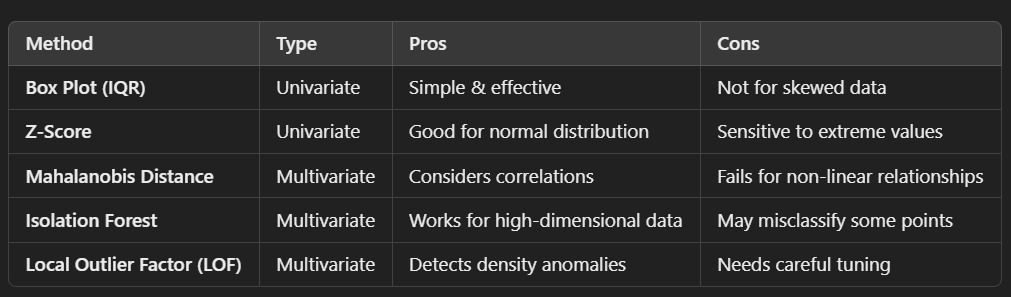

## Detecting Outliers Using Histograms

A histogram helps to detect univariate outliers.

In [13]:
# Creating a dataset with outliers
np.random.seed(42)

# Generate normal data for two features
data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Add outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Add outliers
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883


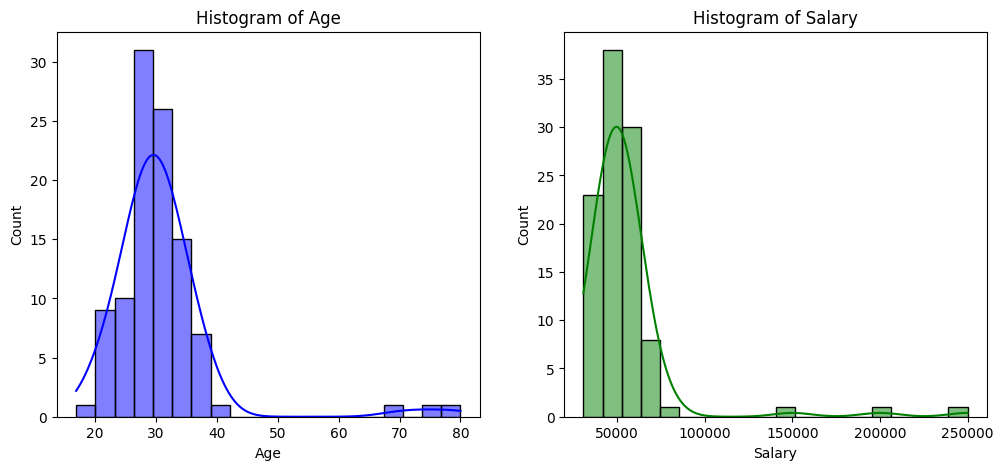

In [14]:
# Plot histograms for each column
plt.figure(figsize=(12, 5))

# Age Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Histogram of Age")

# Salary Histogram
plt.subplot(1, 2, 2)
sns.histplot(df["Salary"], bins=20, kde=True, color="green")
plt.title("Histogram of Salary")

plt.show()


**How it Works:**

- Tall bars indicate frequent values.
- Long tails or isolated bars suggest potential outliers.

## Detecting Outliers Using Pair Plots
A pair plot (scatter plot matrix) helps detect multivariate outliers.

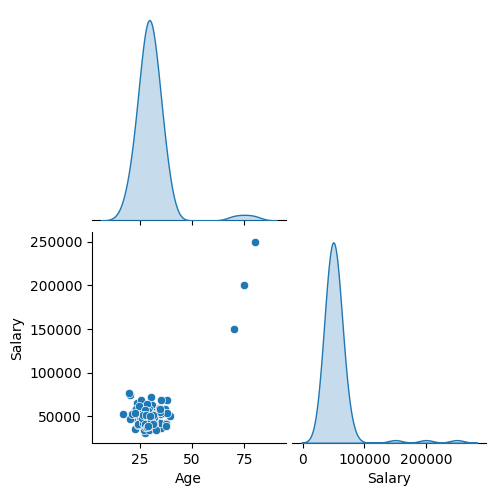

In [15]:
# Pair plot visualization
sns.pairplot(df, diag_kind="kde", markers="o", corner=True)
plt.show()


**How it Works:**

- Scatter plots show relationships between variables.
- Extreme points far from the cluster suggest outliers.
- KDE (Kernel Density Estimation) plots in diagonal help see the distribution.

# 1️⃣ Outlier Detection Using Statistical Methods in Python

In [17]:
# Creating a dataset with outliers
np.random.seed(42)

# Generate normal data
data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Add outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Add outliers
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()


,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883


## 1️⃣ Interquartile Range (IQR) Method

**How it Works:**

- Q1 (25th percentile) and Q3 (75th percentile) are calculated.
- IQR = Q3 - Q1
- Lower Bound = Q1 - 1.5 * IQR
- Upper Bound = Q3 + 1.5 * IQR
- Any value outside this range is an outlier.

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in Age and Salary
outliers_age = detect_outliers_iqr(df, "Age")
outliers_salary = detect_outliers_iqr(df, "Salary")

print("Outliers in Age (IQR Method):\n")
outliers_age

Outliers in Age (IQR Method):



,Age,Salary
74,16.901274,52766.907993
100,70.000000,150000.000000
101,75.000000,200000.000000
102,80.000000,250000.000000


In [19]:
print("\nOutliers in Salary (IQR Method):\n")
outliers_salary


Outliers in Salary (IQR Method):



,Age,Salary
100,70.0,150000.0
101,75.0,200000.0
102,80.0,250000.0


**When to Use:**

- Best for skewed distributions.
- Works well in real-world datasets.


## 2️⃣ Detecting Outliers Using Z-Score

**How it Works:**

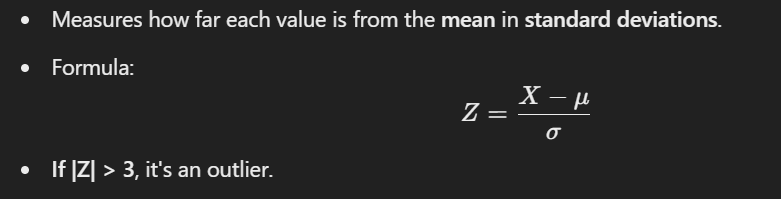

In [20]:
def detect_outliers_zscore(data, column):
    mean = data[column].mean()
    std = data[column].std()
    
    data["Z-Score"] = (data[column] - mean) / std
    outliers = data[(data["Z-Score"] > 3) | (data["Z-Score"] < -3)]
    
    return outliers

# Detect outliers in Age and Salary
outliers_age_z = detect_outliers_zscore(df, "Age")
outliers_salary_z = detect_outliers_zscore(df, "Salary")

print("Outliers in Age (Z-Score Method):\n")
outliers_age_z

Outliers in Age (Z-Score Method):



,Age,Salary,Z-Score
100,70.0,150000.0,4.391047
101,75.0,200000.0,4.951223
102,80.0,250000.0,5.511399


In [21]:
print("\nOutliers in Salary (Z-Score Method):\n")
outliers_salary_z


Outliers in Salary (Z-Score Method):



,Age,Salary,Z-Score
100,70.0,150000.0,3.421054
101,75.0,200000.0,5.213786
102,80.0,250000.0,7.006518


**When to Use:**

- Works best when data is normally distributed.
- Sensitive to extreme outliers.

## 3️⃣ Detecting Outliers Using Modified Z-Score

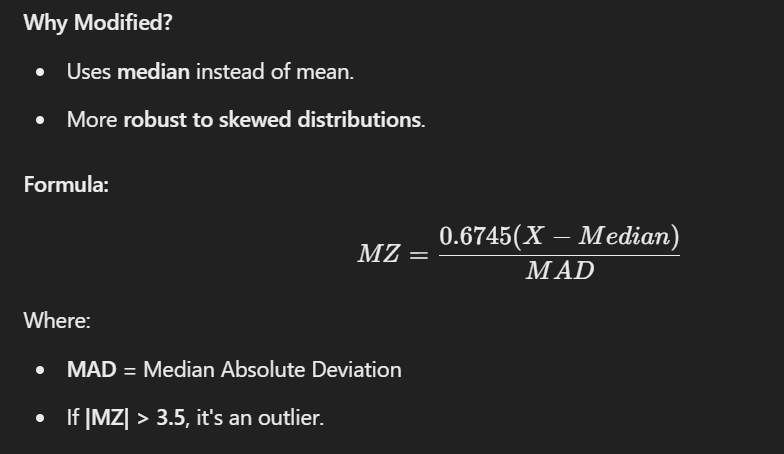

In [24]:
def detect_outliers_modified_zscore(data, column):
    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))
    
    data["Modified Z-Score"] = 0.6745 * (data[column] - median) / mad
    outliers = data[(data["Modified Z-Score"] > 3.5) | (data["Modified Z-Score"] < -3.5)]
    
    return outliers

# Detect outliers in Age and Salary
outliers_age_mz = detect_outliers_modified_zscore(df, "Age")
outliers_salary_mz = detect_outliers_modified_zscore(df, "Salary")

print("Outliers in Age (Modified Z-Score Method):\n")
outliers_age_mz



Outliers in Age (Modified Z-Score Method):



,Age,Salary,Z-Score,Modified Z-Score
100,70.0,150000.0,3.421054,9.573305
101,75.0,200000.0,5.213786,10.759293
102,80.0,250000.0,7.006518,11.945280


In [25]:
print("\nOutliers in Salary (Modified Z-Score Method):\n")
outliers_salary_mz


Outliers in Salary (Modified Z-Score Method):



,Age,Salary,Z-Score,Modified Z-Score
100,70.0,150000.0,3.421054,10.105455
101,75.0,200000.0,5.213786,15.237068
102,80.0,250000.0,7.006518,20.368681


**When to Use:**

- Works well for skewed or non-normal data.
- More robust than the Z-score method.


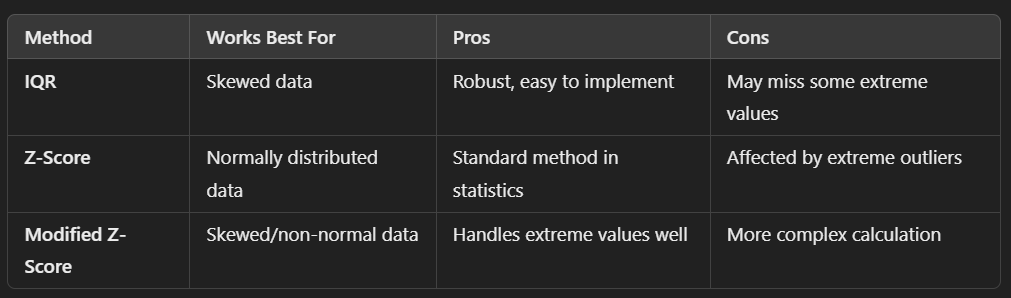

## Method 1: Removing Outliers Using IQR (Interquartile Range)

In [4]:
# Creating a dataset with outliers
np.random.seed(42)

# Generate normal data
data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Add outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Add outliers
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883


In [5]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply IQR method to remove outliers
df_cleaned_iqr = remove_outliers_iqr(df, "Age")
df_cleaned_iqr

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


In [6]:
df_cleaned_iqr = remove_outliers_iqr(df_cleaned_iqr, "Salary")
df_cleaned_iqr

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


## Method 2: Removing Outliers Using Z-Score

In [7]:
def remove_outliers_zscore(data, column):
    mean = data[column].mean()
    std = data[column].std()
    
    return data[np.abs((data[column] - mean) / std) <= 3]

# Apply Z-Score method to remove outliers
df_cleaned_z = remove_outliers_zscore(df, "Age")
df_cleaned_z

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


In [8]:
df_cleaned_z = remove_outliers_zscore(df_cleaned_z, "Salary")
df_cleaned_z

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


## Method 3: Removing Outliers Using Modified Z-Score

In [9]:
def remove_outliers_modified_zscore(data, column):
    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))
    
    return data[np.abs(0.6745 * (data[column] - median) / mad) <= 3.5]

# Apply Modified Z-Score method to remove outliers
df_cleaned_mz = remove_outliers_modified_zscore(df, "Age")
df_cleaned_mz

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


In [10]:
df_cleaned_mz = remove_outliers_modified_zscore(df_cleaned_mz, "Salary")
df_cleaned_mz

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883
...,...,...
95,22.682425,53853.173797
96,31.480601,41161.425638
97,31.305276,51537.251059
98,30.025567,50582.087184


##  Visualizing Before & After Removing Outliers

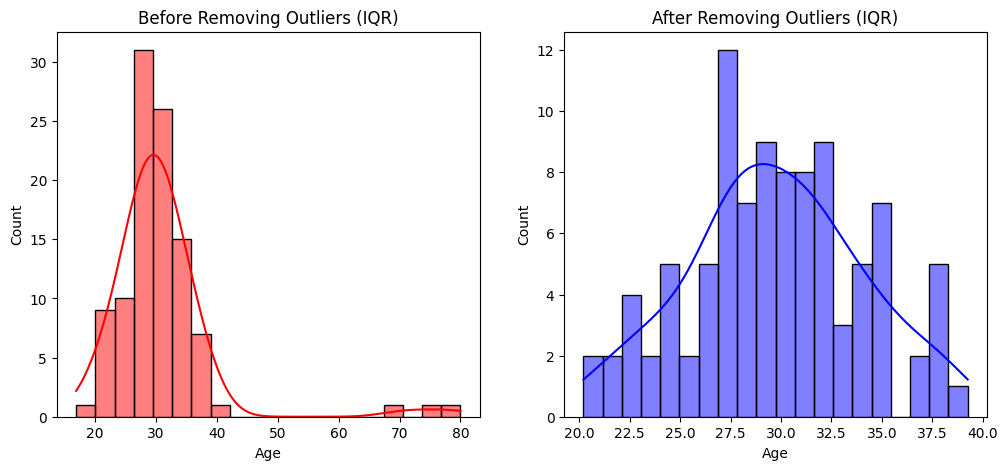

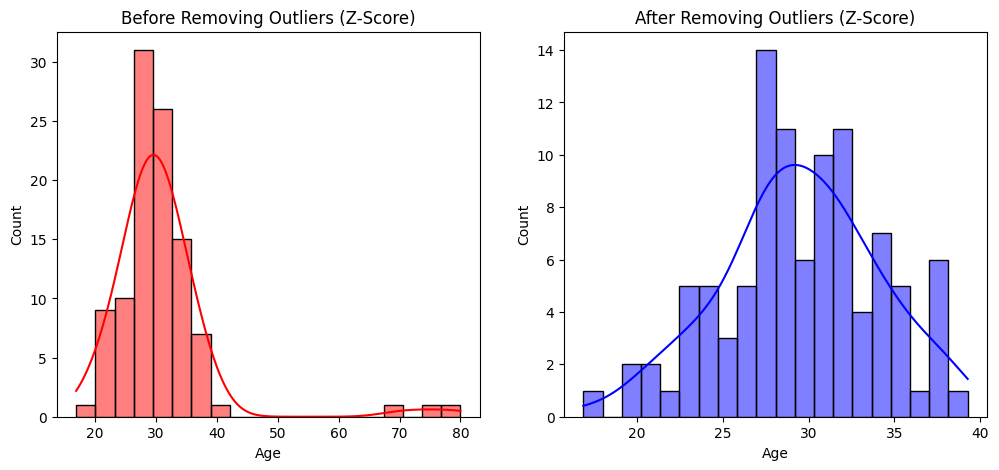

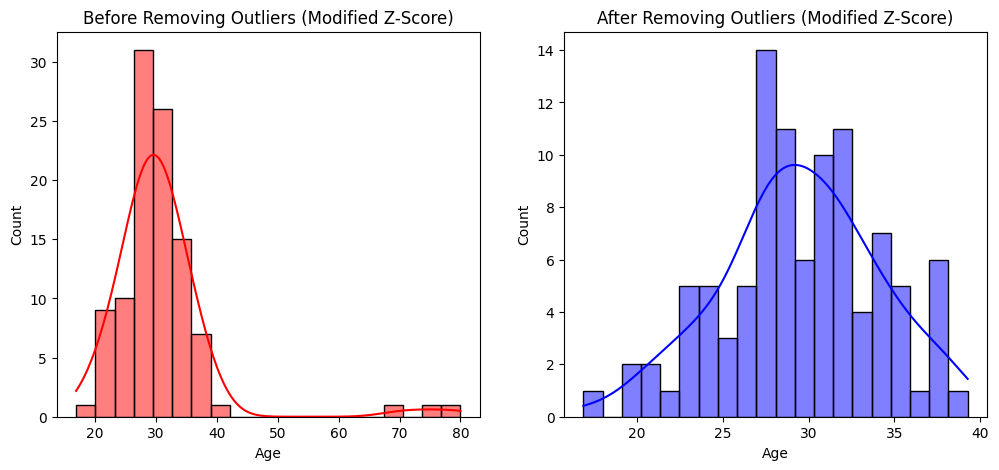

In [11]:
# Function to plot histograms
def plot_histograms(df_before, df_after, column, method):
    plt.figure(figsize=(12, 5))

    # Before Removing Outliers
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[column], bins=20, kde=True, color="red")
    plt.title(f"Before Removing Outliers ({method})")

    # After Removing Outliers
    plt.subplot(1, 2, 2)
    sns.histplot(df_after[column], bins=20, kde=True, color="blue")
    plt.title(f"After Removing Outliers ({method})")

    plt.show()

# Plot histograms for Age and Salary
plot_histograms(df, df_cleaned_iqr, "Age", "IQR")
plot_histograms(df, df_cleaned_z, "Age", "Z-Score")
plot_histograms(df, df_cleaned_mz, "Age", "Modified Z-Score")


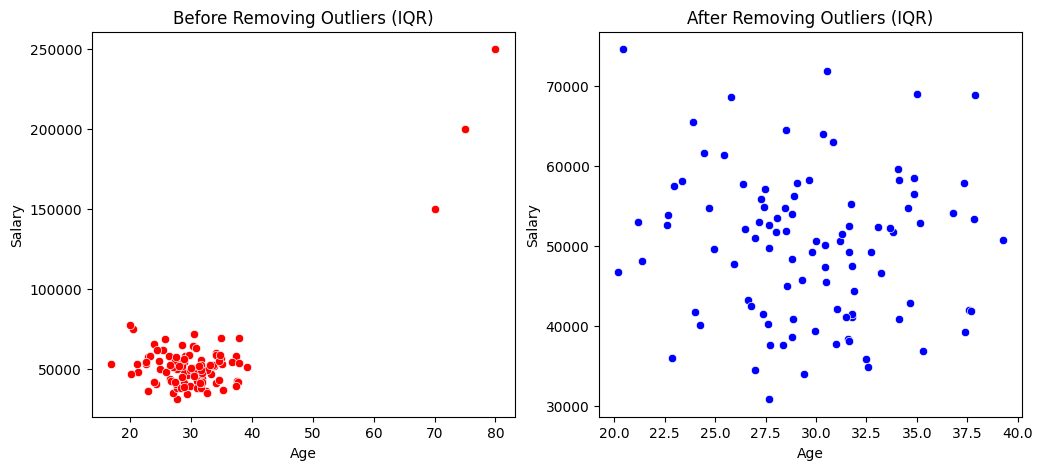

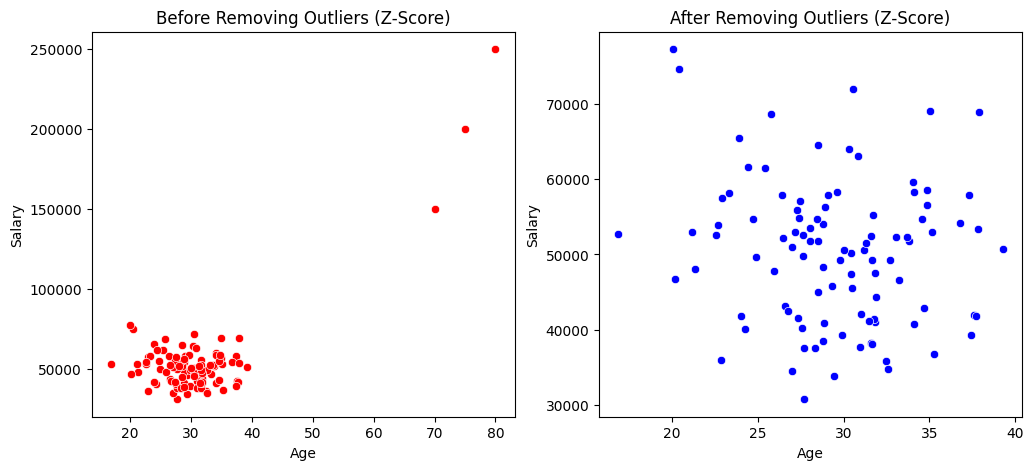

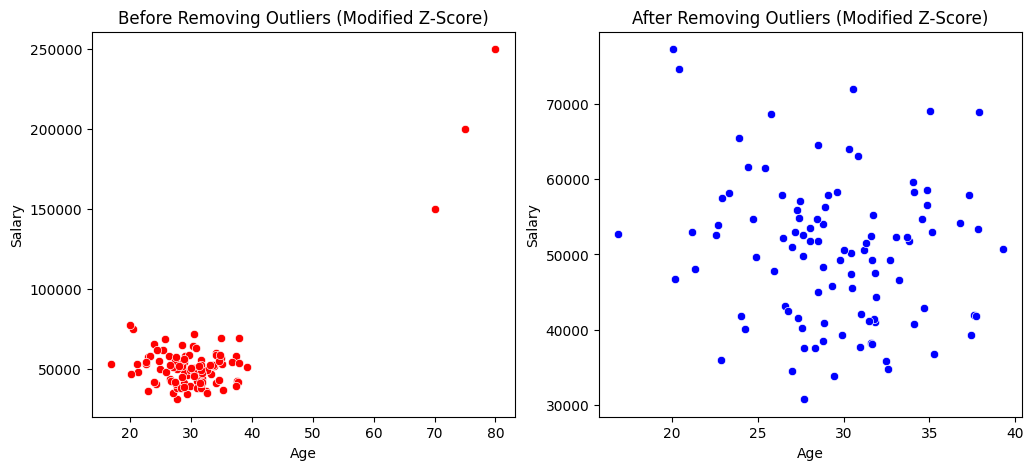

In [12]:
# Function to plot scatter plots
def plot_scatter(df_before, df_after, method):
    plt.figure(figsize=(12, 5))

    # Before Removing Outliers
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_before["Age"], y=df_before["Salary"], color="red")
    plt.title(f"Before Removing Outliers ({method})")
    plt.xlabel("Age")
    plt.ylabel("Salary")

    # After Removing Outliers
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_after["Age"], y=df_after["Salary"], color="blue")
    plt.title(f"After Removing Outliers ({method})")
    plt.xlabel("Age")
    plt.ylabel("Salary")

    plt.show()

# Scatter plot comparison for each method
plot_scatter(df, df_cleaned_iqr, "IQR")
plot_scatter(df, df_cleaned_z, "Z-Score")
plot_scatter(df, df_cleaned_mz, "Modified Z-Score")


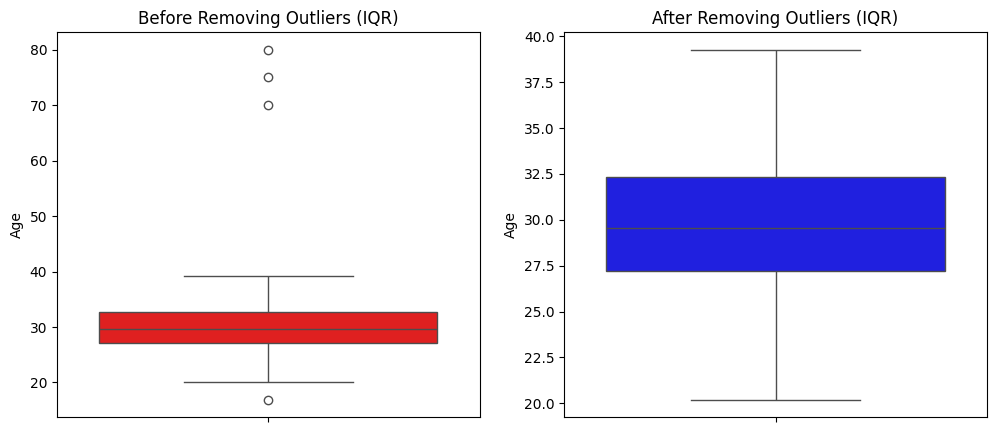

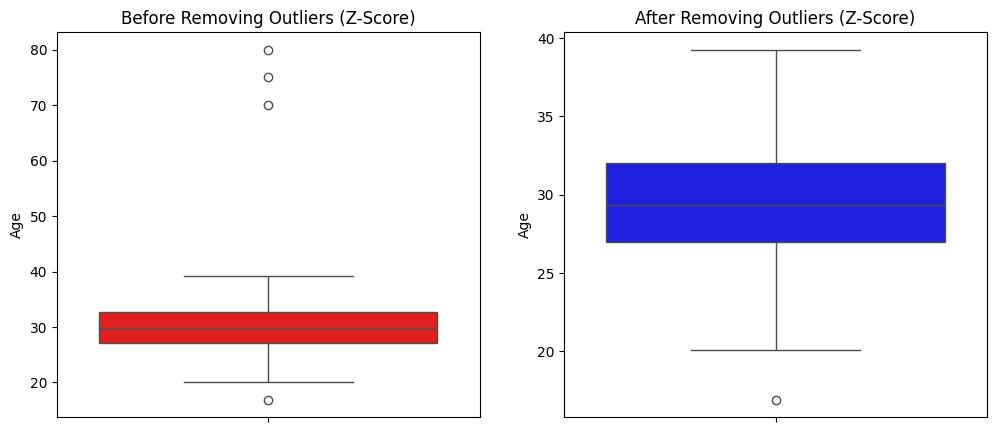

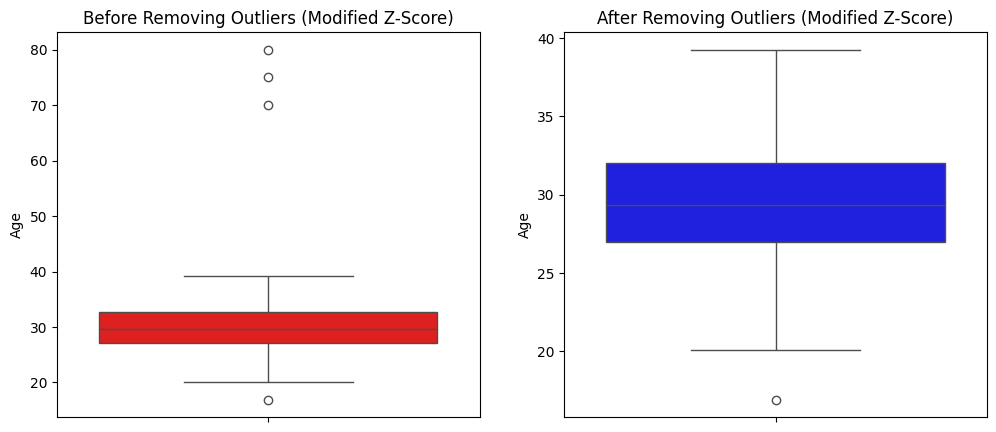

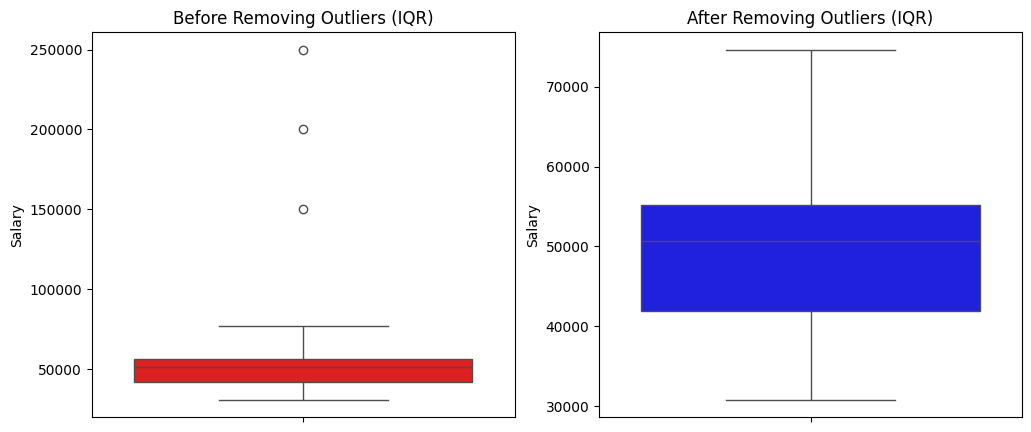

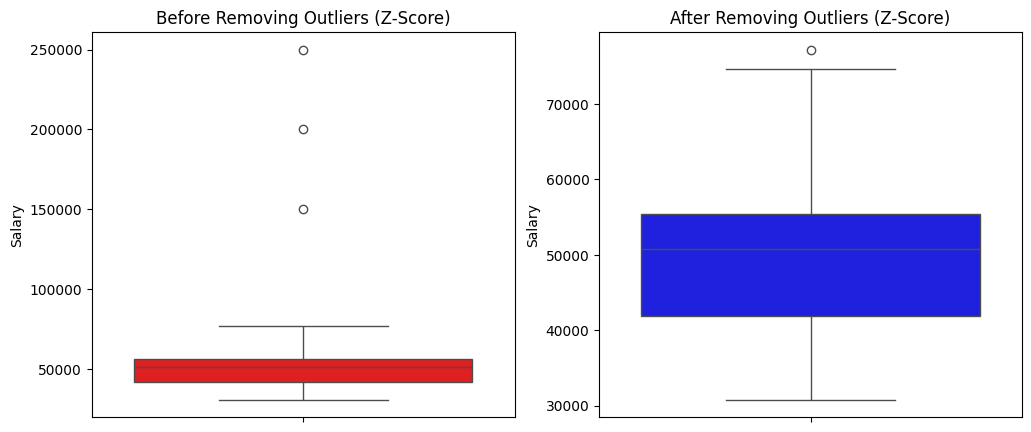

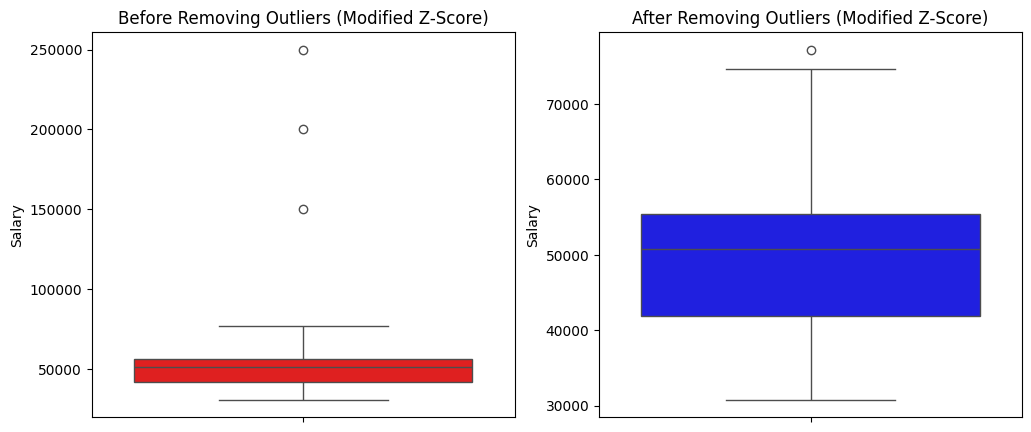

In [13]:
# Function to plot boxplots
def plot_boxplots(df_before, df_after, column, method):
    plt.figure(figsize=(12, 5))

    # Before Removing Outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_before[column], color="red")
    plt.title(f"Before Removing Outliers ({method})")

    # After Removing Outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_after[column], color="blue")
    plt.title(f"After Removing Outliers ({method})")

    plt.show()

# Boxplots for Age
plot_boxplots(df, df_cleaned_iqr, "Age", "IQR")
plot_boxplots(df, df_cleaned_z, "Age", "Z-Score")
plot_boxplots(df, df_cleaned_mz, "Age", "Modified Z-Score")

# Boxplots for Salary
plot_boxplots(df, df_cleaned_iqr, "Salary", "IQR")
plot_boxplots(df, df_cleaned_z, "Salary", "Z-Score")
plot_boxplots(df, df_cleaned_mz, "Salary", "Modified Z-Score")


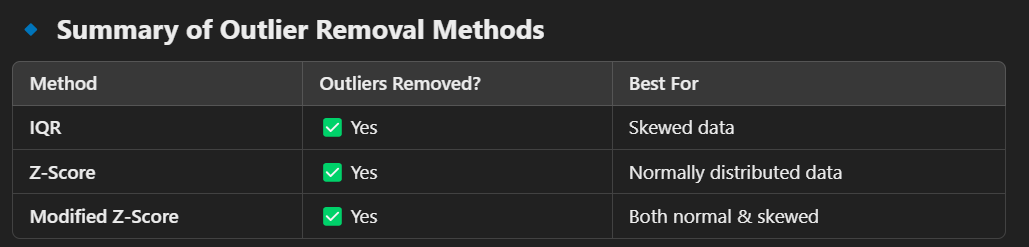

# To apply outlier detection and removal to your own dataset

In [ ]:
import pandas as pd


# Step 1: Load Your Dataset:

# Load your dataset
df = pd.read_csv("your_dataset.csv")  # Replace with your file path

# Display basic info
print(df.info())
print(df.describe())

# If your dataset is too large, you can read it in chunks (useful for big datasets)
chunksize = 10000  # Read 10,000 rows at a time
df_chunks = pd.read_csv("your_dataset.csv", chunksize=chunksize)
df = next(df_chunks)  # Load first chunk


# Step 2: Select Numeric Columns for Outlier Detection:

# Select only numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns
print(numeric_columns)


# Step 3: Apply Outlier Removal Methods

# Option 1: Remove Outliers Using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned_iqr = remove_outliers_iqr(df, numeric_columns)

# Option 2: Remove Outliers Using Z-Score
from scipy.stats import zscore
def remove_outliers_zscore(df, columns):
    for col in columns:
        df = df[np.abs(zscore(df[col])) <= 3]
    return df

df_cleaned_z = remove_outliers_zscore(df, numeric_columns)

# Option 3: Remove Outliers Using Modified Z-Score
def remove_outliers_modified_zscore(df, columns):
    for col in columns:
        median = df[col].median()
        mad = np.median(np.abs(df[col] - median))
        modified_z = 0.6745 * (df[col] - median) / mad
        df = df[np.abs(modified_z) <= 3.5]
    return df

df_cleaned_mz = remove_outliers_modified_zscore(df, numeric_columns)


# Step 4: Compare Before & After Using Visualizations

# Histogram Comparison
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(df_before, df_after, column, method):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_before[column], bins=20, kde=True, color="red")
    plt.title(f"Before Removing Outliers ({method})")

    plt.subplot(1, 2, 2)
    sns.histplot(df_after[column], bins=20, kde=True, color="blue")
    plt.title(f"After Removing Outliers ({method})")

    plt.show()

for col in numeric_columns:
    plot_histograms(df, df_cleaned_iqr, col, "IQR")
    plot_histograms(df, df_cleaned_z, col, "Z-Score")
    plot_histograms(df, df_cleaned_mz, col, "Modified Z-Score")

# Boxplot Comparison
def plot_boxplots(df_before, df_after, column, method):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_before[column], color="red")
    plt.title(f"Before Removing Outliers ({method})")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_after[column], color="blue")
    plt.title(f"After Removing Outliers ({method})")

    plt.show()

for col in numeric_columns:
    plot_boxplots(df, df_cleaned_iqr, col, "IQR")
    plot_boxplots(df, df_cleaned_z, col, "Z-Score")
    plot_boxplots(df, df_cleaned_mz, col, "Modified Z-Score")


# Save the Cleaned Dataset
df_cleaned_iqr.to_csv("cleaned_data_iqr.csv", index=False)
df_cleaned_z.to_csv("cleaned_data_zscore.csv", index=False)
df_cleaned_mz.to_csv("cleaned_data_modified_zscore.csv", index=False)

# Combining Multiple Outlier Detection Methods for a More Refined Approach

Each outlier detection method (IQR, Z-Score, and Modified Z-Score) has strengths and weaknesses. Instead of relying on a single method, we can combine multiple methods to ensure a more accurate and robust approach to outlier removal.

## Approach to Combining Methods
1. Detect outliers using all three methods (IQR, Z-Score, Modified Z-Score).
2. Flag a value as an outlier if detected by at least two methods (majority voting).
3. Remove only those values that are flagged by multiple methods.

## Implementation: Combining IQR, Z-Score, and Modified Z-Score

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load dataset
df = pd.read_csv("your_dataset.csv")

# Select numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = set()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return outlier_indices

# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = set()
    for col in columns:
        z_scores = np.abs(zscore(df[col]))
        outlier_indices.update(df[z_scores > threshold].index)
    return outlier_indices

# Function to detect outliers using Modified Z-Score
def detect_outliers_modified_zscore(df, columns, threshold=3.5):
    outlier_indices = set()
    for col in columns:
        median = df[col].median()
        mad = np.median(np.abs(df[col] - median))
        modified_z = 0.6745 * (df[col] - median) / mad
        outlier_indices.update(df[np.abs(modified_z) > threshold].index)
    return outlier_indices

# Get outliers from each method
outliers_iqr = detect_outliers_iqr(df, numeric_columns)
outliers_zscore = detect_outliers_zscore(df, numeric_columns)
outliers_mzscore = detect_outliers_modified_zscore(df, numeric_columns)

# Find common outliers (majority voting: at least 2 methods should flag it)
outliers_combined = (outliers_iqr & outliers_zscore) | (outliers_iqr & outliers_mzscore) | (outliers_zscore & outliers_mzscore)

# Remove these outliers
df_cleaned = df.drop(index=outliers_combined)

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_data_combined.csv", index=False)

print(f"Total outliers removed: {len(outliers_combined)}")
print(f"Dataset shape before: {df.shape}")
print(f"Dataset shape after: {df_cleaned.shape}")


**Explanation of the Combined Approach**
- Each method independently detects outliers and stores their indices.
- Find common outliers that appear in at least two out of three methods.
- Remove only these flagged values, ensuring we don't remove useful data.

**Advantages of This Approach**
- More accurate outlier detection (avoids false positives from one method).
- Preserves important data while removing extreme values.
- Works well for both normal and skewed distributions.

# Visualizing Outlier Removal Using Combined Methods

After detecting and removing outliers, we can compare the before and after using histograms and boxplots.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Step 1: Load the Dataset

# Load dataset
df = pd.read_csv("your_dataset.csv")

# Select numeric columns
numeric_columns = df.select_dtypes(include=["number"]).columns


# Step 2: Detect and Remove Outliers Using Combined Methods

# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = set()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.update(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return outlier_indices

# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = set()
    for col in columns:
        z_scores = np.abs(zscore(df[col]))
        outlier_indices.update(df[z_scores > threshold].index)
    return outlier_indices

# Function to detect outliers using Modified Z-Score
def detect_outliers_modified_zscore(df, columns, threshold=3.5):
    outlier_indices = set()
    for col in columns:
        median = df[col].median()
        mad = np.median(np.abs(df[col] - median))
        modified_z = 0.6745 * (df[col] - median) / mad
        outlier_indices.update(df[np.abs(modified_z) > threshold].index)
    return outlier_indices

# Get outliers from each method
outliers_iqr = detect_outliers_iqr(df, numeric_columns)
outliers_zscore = detect_outliers_zscore(df, numeric_columns)
outliers_mzscore = detect_outliers_modified_zscore(df, numeric_columns)

# Find common outliers (majority voting: at least 2 methods should flag it)
outliers_combined = (outliers_iqr & outliers_zscore) | (outliers_iqr & outliers_mzscore) | (outliers_zscore & outliers_mzscore)

# Remove outliers
df_cleaned = df.drop(index=outliers_combined)


#  Step 3: Visualizing Outliers Removal

# Histogram Comparison
def plot_histograms(df_before, df_after, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_before[column], bins=20, kde=True, color="red")
    plt.title(f"Before Removing Outliers: {column}")

    plt.subplot(1, 2, 2)
    sns.histplot(df_after[column], bins=20, kde=True, color="blue")
    plt.title(f"After Removing Outliers: {column}")

    plt.show()

for col in numeric_columns:
    plot_histograms(df, df_cleaned, col)

# Boxplot Comparison
def plot_boxplots(df_before, df_after, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_before[column], color="red")
    plt.title(f"Before Removing Outliers: {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_after[column], color="blue")
    plt.title(f"After Removing Outliers: {column}")

    plt.show()

for col in numeric_columns:
    plot_boxplots(df, df_cleaned, col)


#  Step 4: Save the Cleaned Dataset
df_cleaned.to_csv("cleaned_data_combined.csv", index=False)
print(f"Total outliers removed: {len(outliers_combined)}")
print(f"Dataset shape before: {df.shape}")
print(f"Dataset shape after: {df_cleaned.shape}")


# 2️⃣ Outlier Detection Using Visual Methods in Python

In [15]:
# Creating a dataset with outliers
np.random.seed(42)

# Generate normal data
data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Add outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Add outliers
}

# Convert to DataFrame
df = pd.DataFrame(data)

df.head()

,Age,Salary
0,32.483571,35846.292579
1,29.308678,45793.546772
2,33.238443,46572.854835
3,37.615149,41977.227308
4,28.829233,48387.142883


## 1️⃣ Detecting Outliers Using Box Plot (IQR Method)

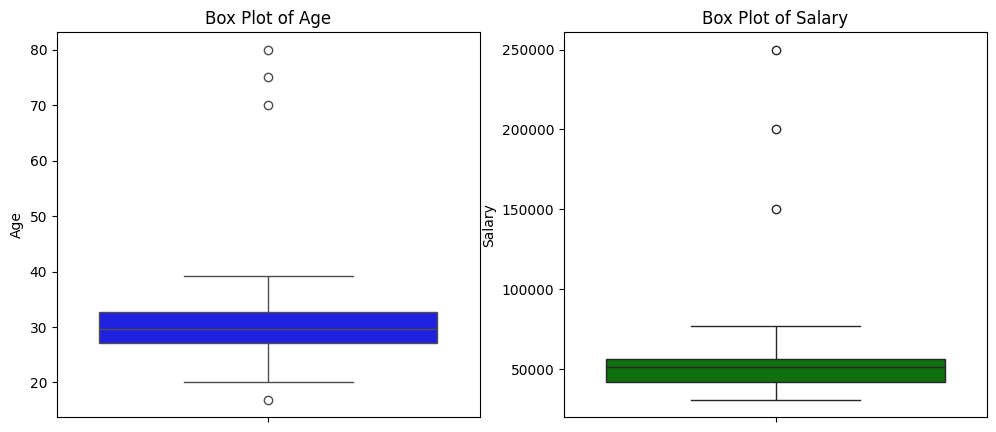

In [16]:
# Box plot for outlier detection
plt.figure(figsize=(12, 5))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df["Age"], color="blue")
plt.title("Box Plot of Age")

# Boxplot for Salary
plt.subplot(1, 2, 2)
sns.boxplot(y=df["Salary"], color="green")
plt.title("Box Plot of Salary")

plt.show()

**What to Look For?**

- Outliers appear as individual points outside the whiskers.
- Helps detect univariate outliers.

## 2️⃣ Detecting Outliers Using Histogram

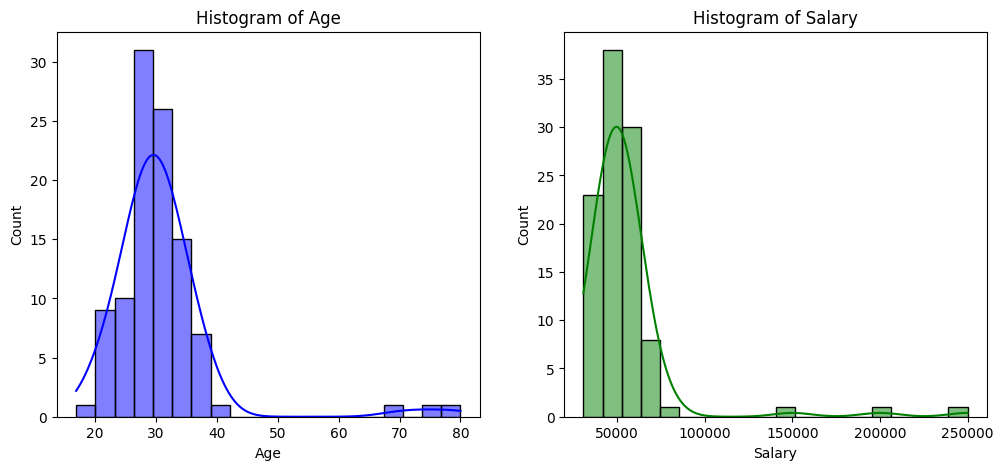

In [17]:
# Plot histograms for each column
plt.figure(figsize=(12, 5))

# Age Histogram
plt.subplot(1, 2, 1)
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Histogram of Age")

# Salary Histogram
plt.subplot(1, 2, 2)
sns.histplot(df["Salary"], bins=20, kde=True, color="green")
plt.title("Histogram of Salary")

plt.show()

**How It Helps?**

- Shows skewness and long tails.
- Isolated bars indicate potential outliers.

## 3️⃣ Detecting Outliers Using Scatter Plot

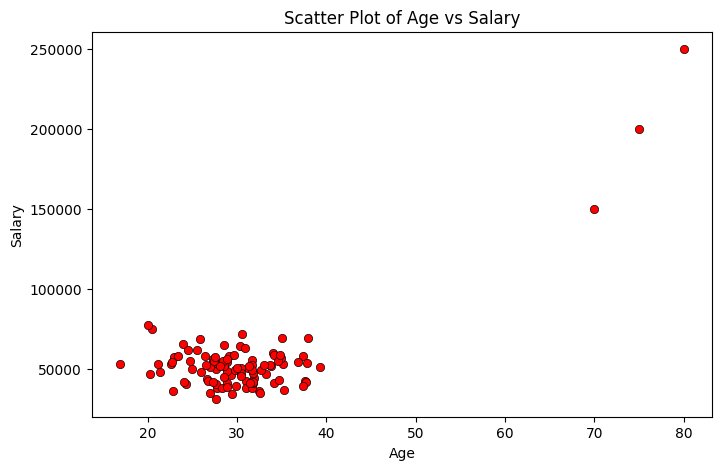

In [18]:
# Scatter plot for detecting outliers
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"], color="red", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Age vs Salary")
plt.show()


**How It Helps?**

- Outliers appear as points far from the main cluster.
- Helps detect multivariate outliers

## 4️⃣ Detecting Outliers Using Pair Plots

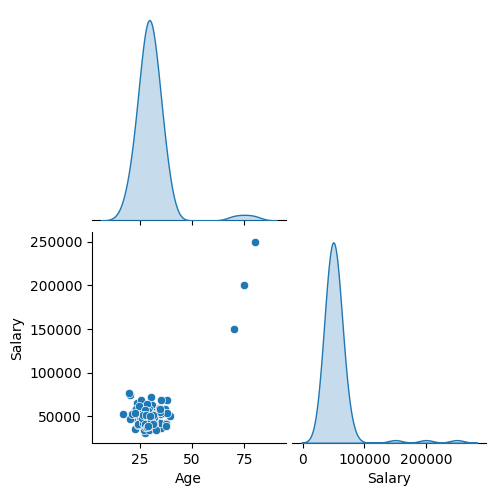

In [19]:
# Pair plot visualization
sns.pairplot(df, diag_kind="kde", markers="o", corner=True)
plt.show()


**What to Look For?**

- Scatter plot relationships help detect multivariate outliers.
- Diagonal KDE plots show the distribution of each variable.

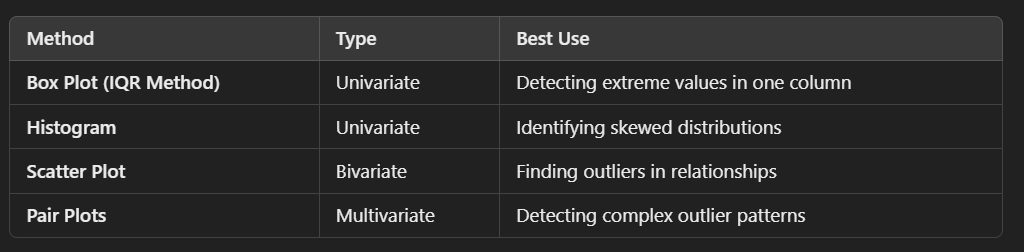

# How to handle outliers

- If caused by errors, drop them. Example: Typos in age (e.g., 150 years old).
- Algorithms like Decision Trees, Random Forest, and Robust Regression are less affected by outliers.
- If outliers carry meaningful information (e.g., fraud detection), analyze them separately.

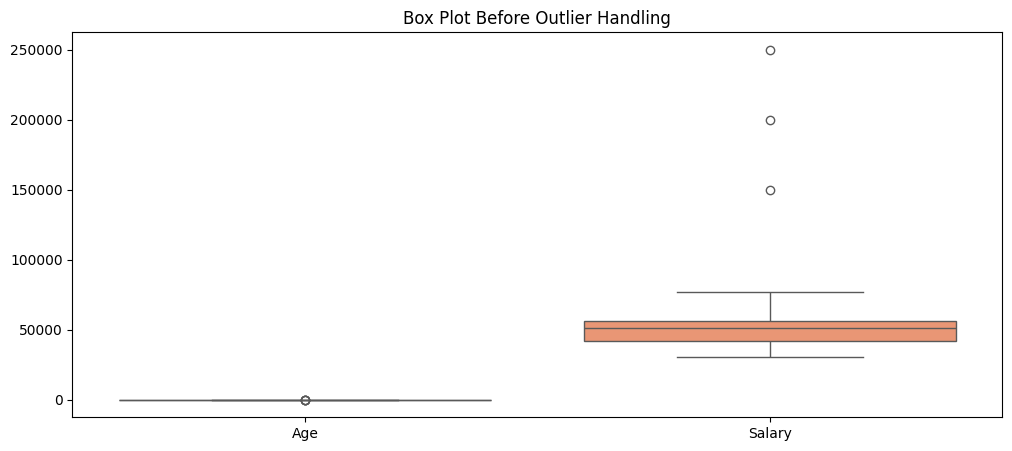

,Age,Salary
count,103.000000,103.000000
mean,30.806570,54585.481428
std,8.925761,27890.389018
min,16.901274,30812.287847
25%,27.092684,42072.347192
50%,29.639949,51537.251059
75%,32.639569,56411.104782
max,80.000000,250000.000000


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize

# Create sample data with outliers
np.random.seed(42)
data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Age outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Salary outliers
}
df = pd.DataFrame(data)

# Visualizing original data
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, palette="Set2")
plt.title("Box Plot Before Outlier Handling")
plt.show()

df.describe()


## 1️⃣ Log Transformation (Reducing Right-Skewed Data)
- 📌 Best for: Right-skewed data (e.g., Salary, House Prices)
- 🛑 Limitation: Cannot be applied to zero or negative values

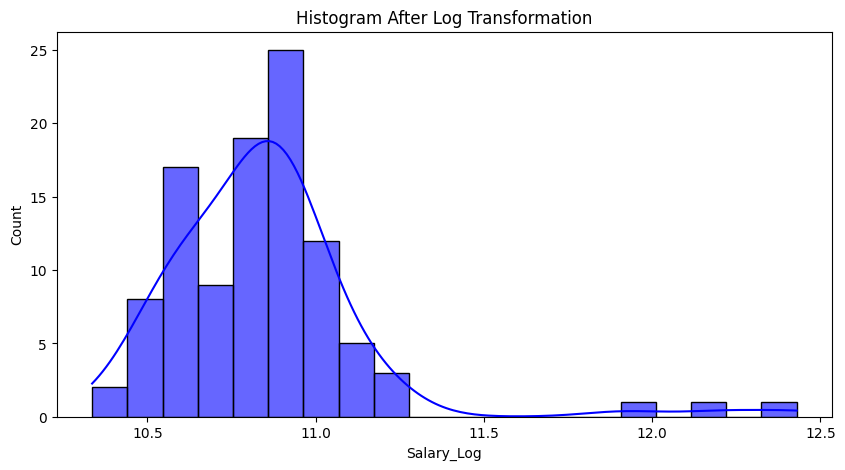

In [29]:
df["Salary_Log"] = np.log(df["Salary"])

# Visualizing transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_Log"], bins=20, kde=True, color="blue", alpha=0.6)
plt.title("Histogram After Log Transformation")
plt.show()


✅ Effect: Reduces the impact of high-value outliers while preserving data relationships.

## 2️⃣ Square Root Transformation (Reducing Skewness)
- 📌 Best for: Slightly skewed data
- 🛑 Limitation: Cannot be applied to negative values

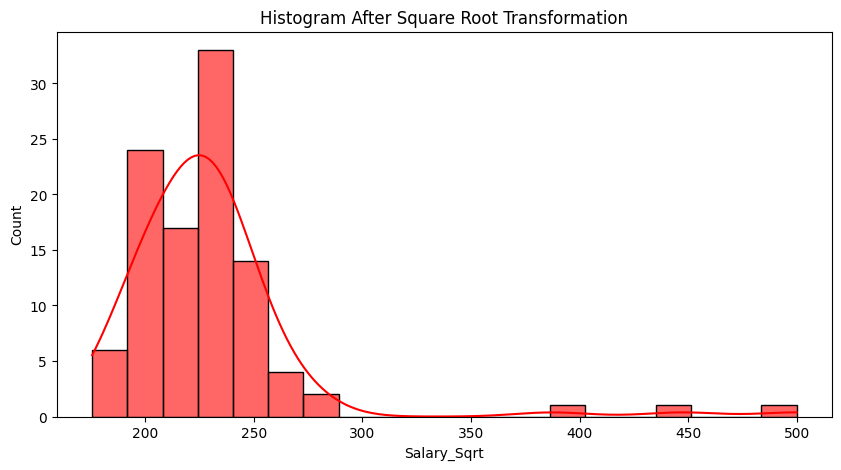

In [30]:
df["Salary_Sqrt"] = np.sqrt(df["Salary"])

# Visualizing transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_Sqrt"], bins=20, kde=True, color="red", alpha=0.6)
plt.title("Histogram After Square Root Transformation")
plt.show()


✅ Effect: Less aggressive than log transformation, but still useful for reducing skewness.

## 3️⃣ Box-Cox Transformation (Handling Skewness in Any Data)
- 📌 Best for: Highly skewed data
- 🛑 Limitation: Works only for positive values

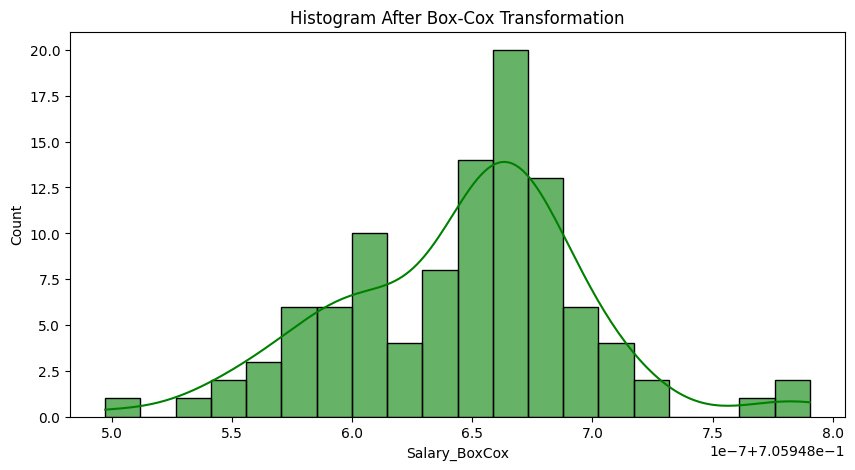

Optimal Lambda Value: -1.4165333107298872


In [31]:
df["Salary_BoxCox"], lambda_val = boxcox(df["Salary"])  # Box-Cox transformation

# Visualizing transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_BoxCox"], bins=20, kde=True, color="green", alpha=0.6)
plt.title("Histogram After Box-Cox Transformation")
plt.show()

print(f"Optimal Lambda Value: {lambda_val}")


✅ Effect: Adjusts skewness dynamically based on data properties.

## 4️⃣ Winsorization (Capping Extreme Values)
- 📌 Best for: Retaining all data while reducing the effect of extreme values
- 🛑 Limitation: Alters actual values

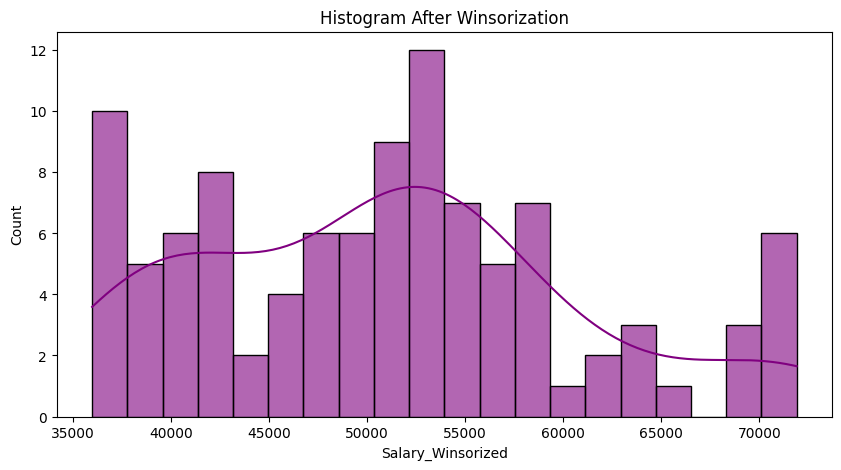

In [32]:
df["Salary_Winsorized"] = winsorize(df["Salary"], limits=[0.05, 0.05])  # Capping 5% from both ends

# Visualizing transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_Winsorized"], bins=20, kde=True, color="purple", alpha=0.6)
plt.title("Histogram After Winsorization")
plt.show()


✅ Effect: Keeps all data but limits extreme values.

## 5️⃣ Binning (Grouping Outliers into Categories)
- 📌 Best for: Converting numerical outliers into meaningful categories
- 🛑 Limitation: Loss of numerical precision

In [33]:
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 18, 40, 60, 100], labels=["Child", "Young Adult", "Adult", "Senior"])

# Checking the number of values in each category
print(df["Age_Group"].value_counts())


Age_Group
Young Adult    99
Senior          3
Child           1
Adult           0
Name: count, dtype: int64


✅ Effect: Helps in handling extreme values without removing data.

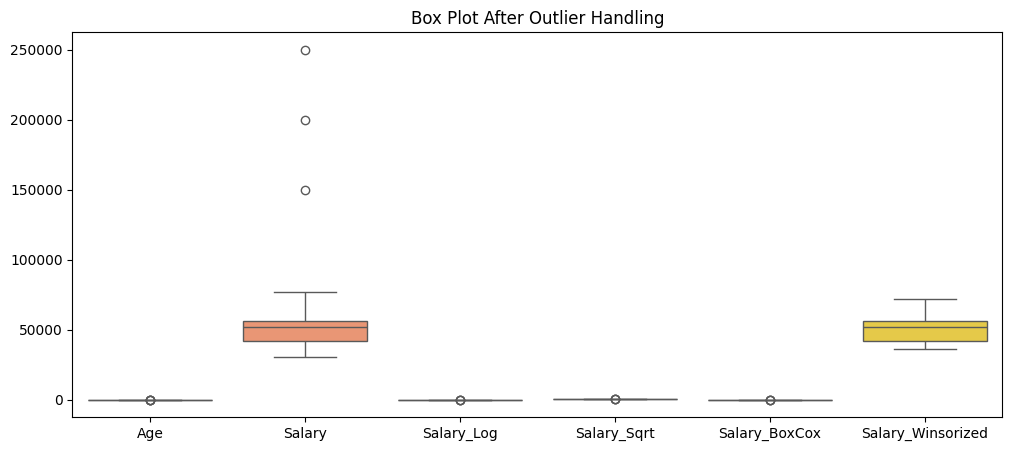

In [34]:
# Box Plot After Handling Outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=df.drop(columns=["Age_Group"]), palette="Set2")
plt.title("Box Plot After Outlier Handling")
plt.show()


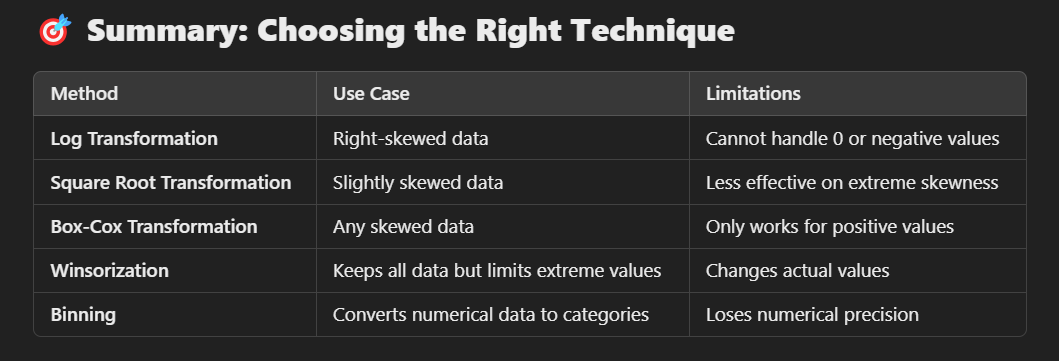

# Apply outlier handling techniques to your dataset

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a dataset with outliers
np.random.seed(42)

data = {
    "Age": np.random.normal(30, 5, 100).tolist() + [70, 75, 80],  # Outliers
    "Salary": np.random.normal(50000, 10000, 100).tolist() + [150000, 200000, 250000]  # Outliers
}

# Step 1: Load the Dataset

df = pd.DataFrame(data)

df.describe()  # Checking summary statistics


,Age,Salary
count,103.000000,103.000000
mean,30.806570,54585.481428
std,8.925761,27890.389018
min,16.901274,30812.287847
25%,27.092684,42072.347192
50%,29.639949,51537.251059
75%,32.639569,56411.104782
max,80.000000,250000.000000


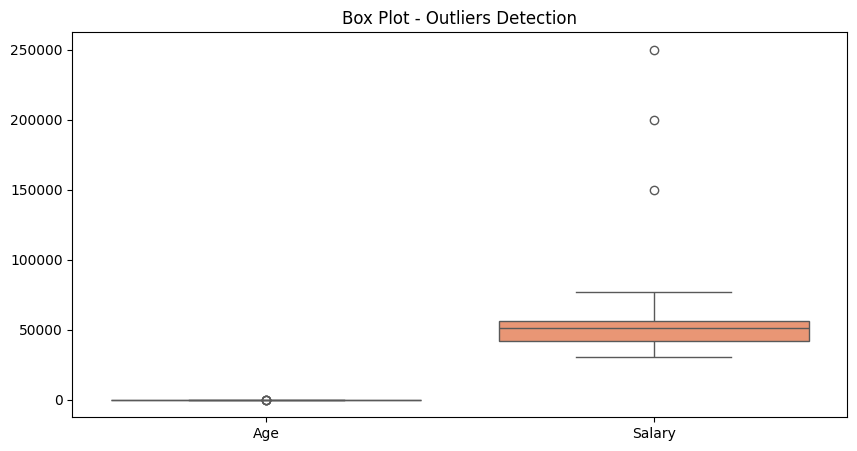

In [21]:
# Step 2: Detect Outliers

# Box Plot to Visualize Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, palette="Set2")
plt.title("Box Plot - Outliers Detection")
plt.show()


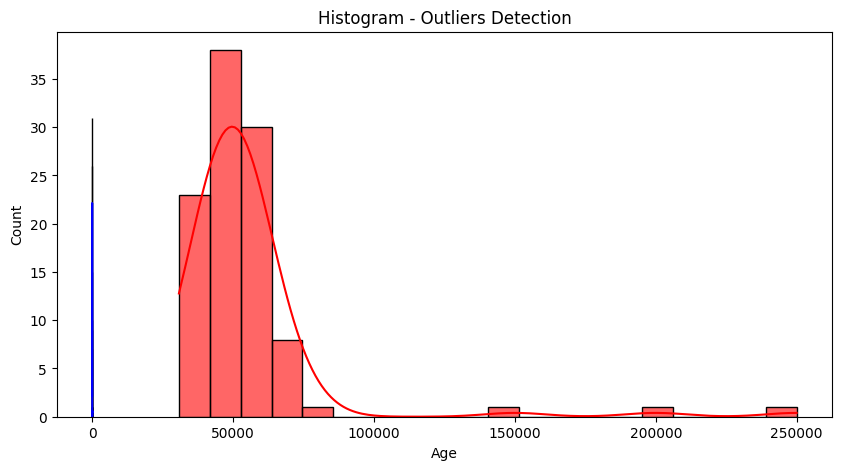

In [22]:
# Histogram to Check Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="blue", alpha=0.6)
sns.histplot(df["Salary"], bins=20, kde=True, color="red", alpha=0.6)
plt.title("Histogram - Outliers Detection")
plt.show()


In [23]:
#  Step 3: Apply Outlier Handling Techniques

# 1️⃣ Removing Outliers Using IQR (Interquartile Range)

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from Age and Salary columns
df_clean_iqr = remove_outliers_iqr(df, "Age")
df_clean_iqr = remove_outliers_iqr(df_clean_iqr, "Salary")

print(f"Original Dataset Size: {df.shape}")
print(f"After IQR Removal: {df_clean_iqr.shape}")

Original Dataset Size: (103, 2)
After IQR Removal: (98, 2)


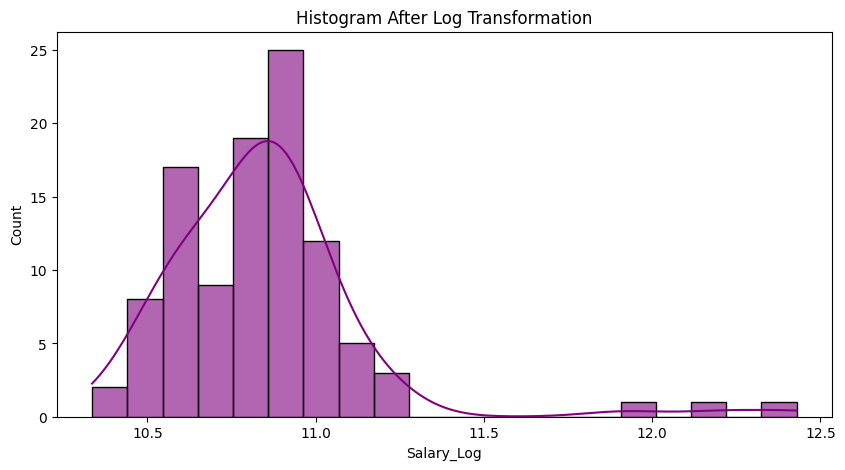

In [24]:
# 2️⃣ Log Transformation to Reduce Impact of Outliers

df["Salary_Log"] = np.log(df["Salary"])

plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_Log"], bins=20, kde=True, color="purple", alpha=0.6)
plt.title("Histogram After Log Transformation")
plt.show()

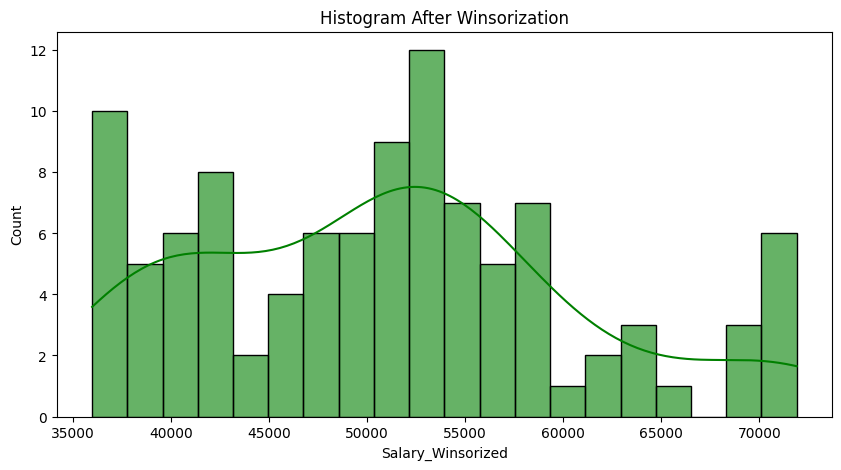

In [25]:
# 3️⃣ Winsorization (Capping Extreme Values)

from scipy.stats.mstats import winsorize

df["Salary_Winsorized"] = winsorize(df["Salary"], limits=[0.05, 0.05])  # Capping 5% from both ends

plt.figure(figsize=(10, 5))
sns.histplot(df["Salary_Winsorized"], bins=20, kde=True, color="green", alpha=0.6)
plt.title("Histogram After Winsorization")
plt.show()

In [26]:
# 4️⃣ Binning Outliers into Categories

df["Age_Group"] = pd.cut(df["Age"], bins=[0, 18, 40, 60, 100], labels=["Child", "Young Adult", "Adult", "Senior"])
print(df["Age_Group"].value_counts())

Age_Group
Young Adult    99
Senior          3
Child           1
Adult           0
Name: count, dtype: int64


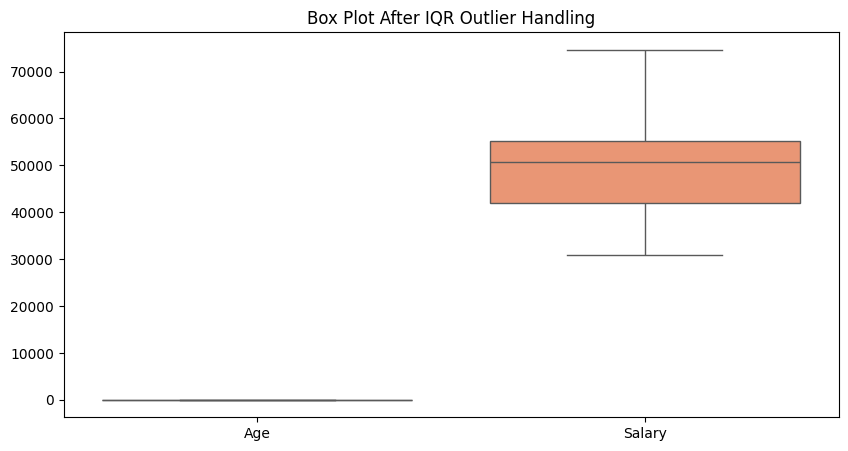

In [27]:
#  Step 4: Compare Results

# Box Plot After Handling Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean_iqr, palette="Set2")
plt.title("Box Plot After IQR Outlier Handling")
plt.show()


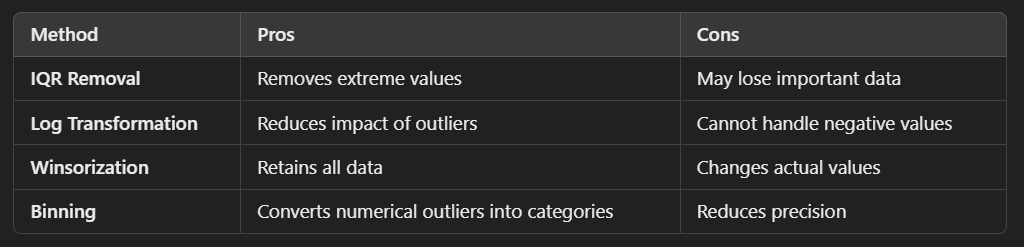

You do not need to apply all methods at once. The right approach depends on your dataset and the context of your analysis. Here's how to decide:

### When to Use a Single Outlier Removal Method?
Use one method if: 
- ✅ You are confident that the detected outliers are errors.
- ✅ The dataset is small, and removing outliers won’t impact the analysis.
- ✅ The data follows a normal distribution, and a simple IQR or Z-score method is sufficient.

📌 Example: If you have employee salary data, extreme values (e.g., $1M salaries) might be valid. Instead of removing them, you may use Winsorization or Log Transformation to adjust their impact.

### When to Apply Multiple Techniques?
Use multiple methods step by step if: 
- ✅ The dataset is large, and removing a few outliers won’t harm analysis.
- ✅ You want to compare different techniques and choose the best one.
- ✅ You are handling skewed distributions (use IQR first, then log transformation).

📌 Example Workflow: 
- 1️⃣ Detect outliers using Box Plot and Z-Score.
- 2️⃣ Apply IQR method to remove extreme outliers.
- 3️⃣ Use Log Transformation to adjust skewed distributions.
- 4️⃣ If necessary, Winsorization to cap extreme values without removal.

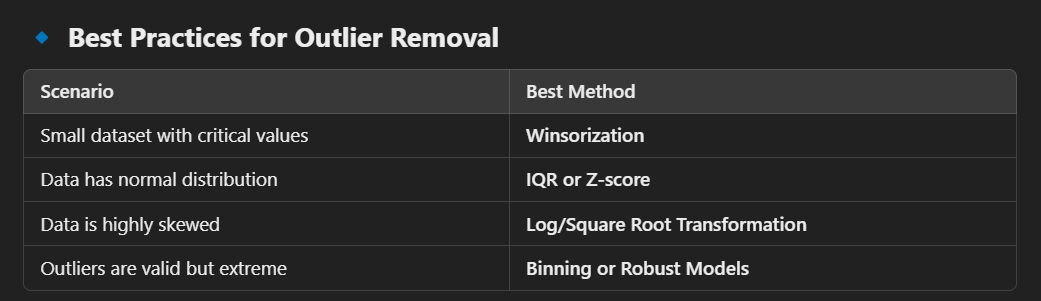

# 1️⃣ 2️⃣ 3️⃣ 4️⃣ 5️⃣ 6️⃣ 7️⃣ 8️⃣ 9️⃣ 🔟